<h1>CytoPy lite and exploring meta clusters</h1>

Start by importing the two convenience functions I've created for visualising the meta clusters. We also want to import pandas, which we will use to load in the dataframes sent via email.

Quick recap on controlling jupyter notebook cells:
* Click run or CTRL+ENTER to run the code in a cell
* Some cells can be "markdown" cells, meaning they contain free text. You can control the type of cell using the dropdown menu in the top control bar
* Code is run in order (see the number next to the cell). So if a cell depends on code in a cell before it, the dependencies must be run first. If you change the code in a cell it won't take effect unless you rerun that cell

In [1]:
from static_plots import clusterplot, clustermap

In [2]:
import pandas as pd

# I've imported seaborn just to customise the way plots look, you can ignore these lines
import seaborn as sns
# Change the font_scale to increase/decrease font size
sns.set(style="white", font_scale=1.3)

<h1>Loading in the data</h1>

This variable points to the folder containing your meta-clustering data. Change this to your local folder e.g. `C:/Downloads/LindasData/`

NOTE: we always use backward slash. Windows is broken. They chose to use forward slash for file paths back in the MSDOS days of the late 80s, every engineer has hated them since.

In [3]:
LOCAL_DATA = "/home/ross/CytoPy_Experiments/ILTIS/LindasData/"

The funny looking string below with an `f` in front is an f-string, we can insert variables into a string within curly brackets.

`f"{LOCAL_DATA}raw_t1.csv"` is the same as `"/home/ross/CytoPy_Experiments/ILTIS/LindasData/raw_t1.csv"`

In [34]:
data = pd.read_csv(f"{LOCAL_DATA}raw_t1.csv")
# Include this line of code for every dataframe you load in, it just drops the first column
data.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
data.head()

,C8,C10,C12,C3-OH (LACTIC),C22:6,C20:4,C18:2,C18:3,C20:5,C14,...,CD45RA,PanGD,CD4,CD27,n_events,meta_cluster_n,meta_cluster_size,28 day mortality,Age (Yrs),septic
0,1.1,1.1,14.2,277.2,5.4,6.5,71.5,8.7,1.0,32.4,...,0.171925,0.318226,0.719857,0.660087,81174,5237,0.064516,False,68.0,True
1,1.1,1.1,14.2,277.2,5.4,6.5,71.5,8.7,1.0,32.4,...,0.230187,0.089241,0.715741,0.647091,81174,5588,0.068840,False,68.0,True
2,1.1,1.1,14.2,277.2,5.4,6.5,71.5,8.7,1.0,32.4,...,0.171864,0.324220,0.711058,0.652870,81174,4648,0.057260,False,68.0,True
3,1.1,1.1,14.2,277.2,5.4,6.5,71.5,8.7,1.0,32.4,...,0.198972,0.256525,0.690947,0.345045,81174,45447,0.559871,False,68.0,True
4,1.1,1.1,14.2,277.2,5.4,6.5,71.5,8.7,1.0,32.4,...,0.453622,0.182587,0.692511,0.353220,81174,4250,0.052357,False,68.0,True


In [6]:
data.columns

Index(['C8', 'C10', 'C12', 'C3-OH (LACTIC)', 'C22:6', 'C20:4', 'C18:2',
       'C18:3', 'C20:5', 'C14', 'C16', 'C18:1', 'C4 carnitine', 'C6 carnitine',
       'C8 carnitine', 'C10 carnitine', 'C12 carnitine', 'C2 carnitine',
       'C14 carnitine', 'C16 carnitine', 'C18 carnitine', 'C18:1 carnitine',
       'subject_id', 'meta_label', 'CD57', 'CD161', 'CCR7', 'Va7-2', 'CD8',
       'Vd2', 'CD45RA', 'PanGD', 'CD4', 'CD27', 'n_events', 'meta_cluster_n',
       'meta_cluster_size', '28 day mortality', 'Age (Yrs)', 'septic'],
      dtype='object')

Every dataframe contains the same columns:
* C8 -> C18:1 carnitine: these are the lipids, will either be raw values, pareto scaled or standard scale (minus mean and divided by standard deviation)
* subject_id: the patient identifier, prefixed with either "sep" or "hc" for sepsis and healthy controls, respectively
* meta_label: name of the meta cluster
* CD57 -> CD27: the cell surface markers and their flourescent intensity. The value for each row (each unique meta cluster for a patient) is the average (median) flourescence.
* n_events: number of cells recorded for this patient in the parent population of the dataframe (specified in the filename) e.g. t1 = number T cells, n1 = number of Neutrophils, m1 = number of monocytes
* meta_cluster_n: the number of cells in that meta cluster
* meta_cluster_size: proportion of cells in the meta cluster relative to n_events (meta_cluster_n/n_events)
* 28 day mortality: did the patient die within 28 days of enrolment
* Age (Yrs): self explanatory (missing for healthy donors)
* septic: is the patient a sepsis patient or healthy control


<h2>Pandas recap</h2>

Quick reminder on subsetting pandas dataframes:

In [7]:
small_example = data.sample(10)

We call this a `mask`:

In [8]:
small_example.septic == True

77      True
273    False
357     True
177     True
435    False
286     True
341    False
189     True
15      True
103     True
Name: septic, dtype: bool

We specify a column (we can do this with dot notation e.g. `small_example.septic` or using square brackets and the name of the column e.g. `small_example["septic"]`) and then specify some condition. This returns a vector or matrix of boolean values. So the above example, if tells us which rows correspond to sepsis patients.

We pass the mask into square brackets to subset the dataframe:

In [9]:
small_example[small_example.septic == True]

,C8,C10,C12,C3-OH (LACTIC),C22:6,C20:4,C18:2,C18:3,C20:5,C14,...,CD45RA,PanGD,CD4,CD27,n_events,meta_cluster_n,meta_cluster_size,28 day mortality,Age (Yrs),septic
77,0.0,0.9,7.5,472.8,5.0,4.8,42.7,4.8,0.6,16.8,...,0.799898,-0.233617,0.544180,0.668834,104251,4941,0.047395,False,75.0,True
357,1.7,1.5,10.2,492.1,5.5,2.5,74.5,9.9,0.4,29.2,...,0.469424,0.528459,0.203478,0.648062,98963,418,0.004224,True,53.0,True
177,0.0,1.2,12.9,369.6,9.3,8.4,128.0,11.1,0.8,46.0,...,0.822578,-0.180509,0.082679,0.209481,136479,4660,0.034144,False,79.0,True
286,28.3,26.7,14.6,566.4,4.6,4.4,62.1,8.6,0.4,30.4,...,0.776701,0.500010,-0.019921,0.593312,10923,2224,0.203607,False,40.0,True
189,0.0,0.3,0.8,332.2,1.4,3.0,13.1,0.8,0.2,3.2,...,0.115271,0.486732,0.685703,0.643665,96804,16218,0.167534,False,59.0,True
15,1.0,1.1,9.4,124.4,7.9,17.3,101.0,13.0,2.1,37.3,...,0.255752,0.185574,0.078954,0.648602,20587,2086,0.101326,False,42.0,True
103,29.5,15.8,3.4,157.7,2.6,4.4,37.7,4.7,0.4,7.0,...,0.778835,0.362912,0.751445,0.685888,58167,15729,0.270411,NaN,NaN,True


We now only have 8 rows instead of 10.

We can create more complex queries by chaining conditions with the `&` (and) or the `|` (or) signs. We must put each condition inside parentheses:

In [13]:
# Notice I use square brackets to access the C22:6 column, thats because the column name does not 
# support dot notation because it contains a colon
small_example[(small_example.septic == True) & (small_example["C22:6"] < 5)]

,C8,C10,C12,C3-OH (LACTIC),C22:6,C20:4,C18:2,C18:3,C20:5,C14,...,CD45RA,PanGD,CD4,CD27,n_events,meta_cluster_n,meta_cluster_size,28 day mortality,Age (Yrs),septic
286,28.3,26.7,14.6,566.4,4.6,4.4,62.1,8.6,0.4,30.4,...,0.776701,0.500010,-0.019921,0.593312,10923,2224,0.203607,False,40.0,True
189,0.0,0.3,0.8,332.2,1.4,3.0,13.1,0.8,0.2,3.2,...,0.115271,0.486732,0.685703,0.643665,96804,16218,0.167534,False,59.0,True
103,29.5,15.8,3.4,157.7,2.6,4.4,37.7,4.7,0.4,7.0,...,0.778835,0.362912,0.751445,0.685888,58167,15729,0.270411,NaN,NaN,True


In [14]:
small_example[(small_example.septic == True) | (small_example["C22:6"] < 5)]

,C8,C10,C12,C3-OH (LACTIC),C22:6,C20:4,C18:2,C18:3,C20:5,C14,...,CD45RA,PanGD,CD4,CD27,n_events,meta_cluster_n,meta_cluster_size,28 day mortality,Age (Yrs),septic
77,0.0,0.9,7.5,472.8,5.0,4.8,42.7,4.8,0.6,16.8,...,0.799898,-0.233617,0.544180,0.668834,104251,4941,0.047395,False,75.0,True
357,1.7,1.5,10.2,492.1,5.5,2.5,74.5,9.9,0.4,29.2,...,0.469424,0.528459,0.203478,0.648062,98963,418,0.004224,True,53.0,True
177,0.0,1.2,12.9,369.6,9.3,8.4,128.0,11.1,0.8,46.0,...,0.822578,-0.180509,0.082679,0.209481,136479,4660,0.034144,False,79.0,True
286,28.3,26.7,14.6,566.4,4.6,4.4,62.1,8.6,0.4,30.4,...,0.776701,0.500010,-0.019921,0.593312,10923,2224,0.203607,False,40.0,True
341,1.2,0.6,2.4,232.8,4.3,7.5,35.6,3.6,1.5,11.9,...,0.130643,0.327593,0.712104,0.675329,546893,101161,0.184974,NaN,NaN,False
189,0.0,0.3,0.8,332.2,1.4,3.0,13.1,0.8,0.2,3.2,...,0.115271,0.486732,0.685703,0.643665,96804,16218,0.167534,False,59.0,True
15,1.0,1.1,9.4,124.4,7.9,17.3,101.0,13.0,2.1,37.3,...,0.255752,0.185574,0.078954,0.648602,20587,2086,0.101326,False,42.0,True
103,29.5,15.8,3.4,157.7,2.6,4.4,37.7,4.7,0.4,7.0,...,0.778835,0.362912,0.751445,0.685888,58167,15729,0.270411,NaN,NaN,True


<h1>Clustered heatmaps</h1>

The first convenience function is `clustermap`, it wraps around the `seaborn.clustermap` function but summarises the metaclusters first by taking the average flourescent intensity values of each meta-cluster. Use this function to look at differences between meta-clusters, rather than differences between patients.

The `clustermap` function takes three arguments:

* data: the dataframe to use
* features: the list of columns to use in the heatmap
* summary_method: how to summarise the meta clusters (either mean or median)

You can also pass in any additional keyword arguments avaible from the `seaborn.clustermap` function, used to customise the heatmap. See here for details: https://seaborn.pydata.org/generated/seaborn.clustermap.html

In the example below I'm going to subset the dataframe to only include sepsis patients, choose as features the cell surface markers and a couple of lipids, and choose not to cluster the columns of the heatmap (`col_cluster=False`). The `cmap` argument controls the colour palette (https://seaborn.pydata.org/tutorial/color_palettes.html) and `standard_scale` is whether to normalise each column (1=normalise columns, 0=normalise rows; always normalise columns not rows!)

NOTE: if you're using any of the dataframes that have already had standard transform applied to lipids, this might generate misleading results.

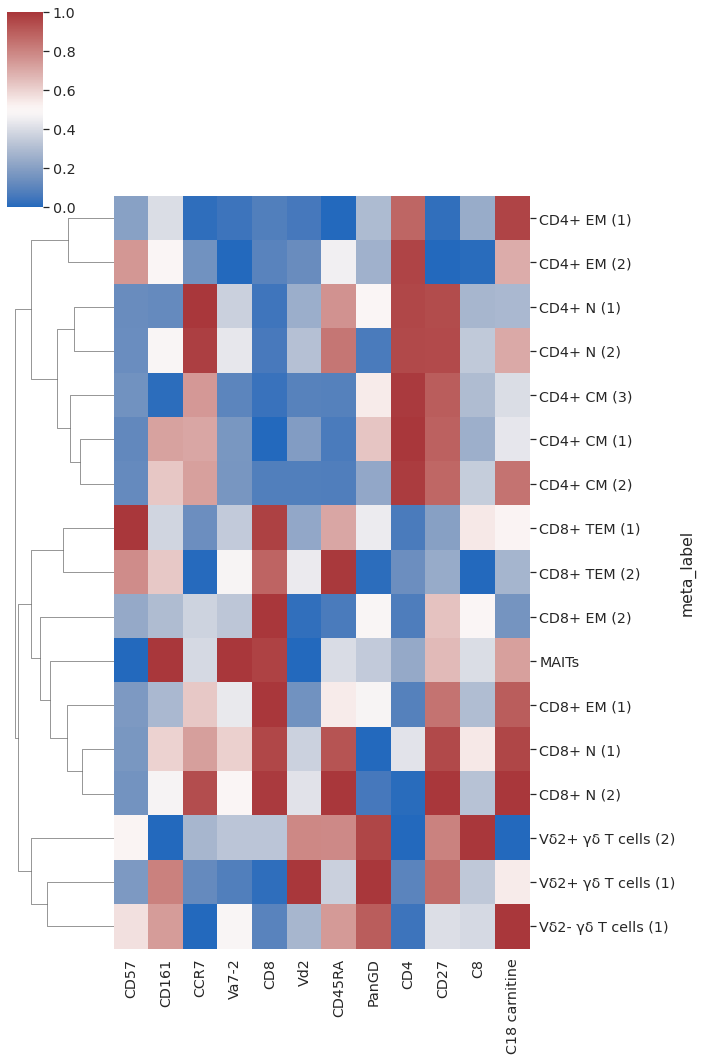

In [15]:
clustermap(data=data[data.septic == True],
           features=['CD57', 'CD161', 'CCR7', 'Va7-2', 'CD8', 
                     'Vd2', 'CD45RA', 'PanGD', 'CD4', 'CD27', 
                     'C8', 'C18 carnitine'],
           col_cluster=False,
           cmap="vlag",
           standard_scale=1)

<h1>Metacluster bubble plots</h1>

The `clusterplot` function plots meta clusters is either two or three dimensional space after applying a dimension reduction algorithm to the given features. Each bubble corresponds to a meta cluster from a unique patient and the size of the bubble is the number of events in the cluster relative to the total number of events captured for that patient. The function takes the following arguments:

* data: the dataframe to plot
* discrete: controls if the label (what colours the bubbles) will be treated like a discrete or continuous variable. If discrete, solid colours will be used and will be accompanied by a legend. If continous, then a gradient will be used and will be accompanied by a colourbar.
* label: what column to use as the label and to colour the points
* features: what columns to use to construst the 2/3 dimensional space
* n_components: the number of dimensions to plot in
* method: how to perform dimension reduction (either UMAP, PHATE, PCA, tSNE, or KernelPCA. PHATE and UMAP are best, PHATE captures more global structure whereas UMAP conserves slightly more local structure)
* scale_factor: factor by which to multiply the size of bubbles by; so controls general size of points. 500-2000 works best

Calculating PHATE...
  Running PHATE on 508 observations and 10 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
    Automatically selected t = 24
  Calculated optimal t in 0.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.02 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.12 seconds.
Calculated PHATE in 0.21 seconds.


<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

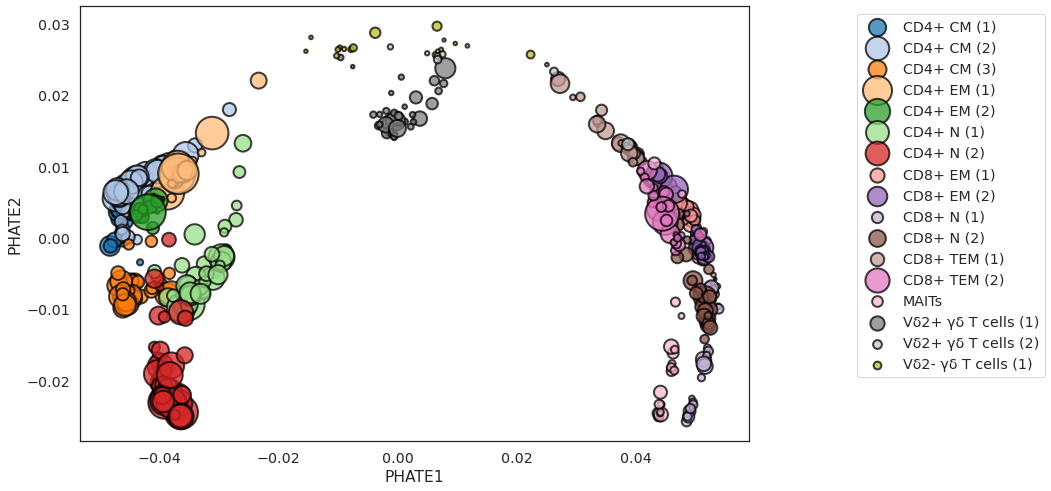

In [17]:
clusterplot(data=data,
            discrete=True,
            label="meta_label",
            features=['CD57', 'CD161', 'CCR7', 'Va7-2', 'CD8', 
                      'Vd2', 'CD45RA', 'PanGD', 'CD4', 'CD27'],
            method="PHATE",
            n_components=2,
            scale_factor=2000)

If we plot in 3 dimensions we want to tell Jupyter Notebooks to use interactive graphs. So that like so:

In [18]:
import matplotlib
%matplotlib notebook

Calculating PHATE...
  Running PHATE on 508 observations and 10 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 24
  Calculated optimal t in 0.03 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.02 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.07 seconds.
Calculated PHATE in 1.14 seconds.


<IPython.core.display.Javascript object>


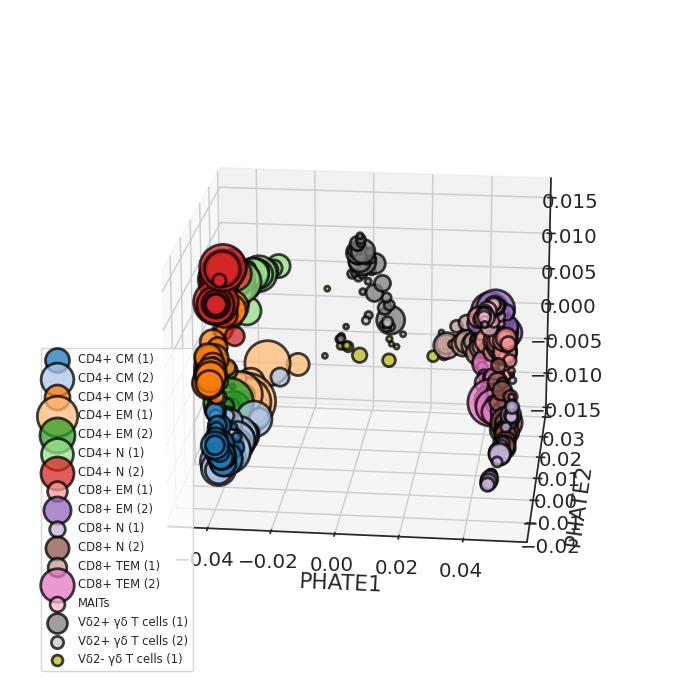

<Axes3DSubplot:xlabel='PHATE1', ylabel='PHATE2'>

In [19]:
clusterplot(data=data,
            discrete=True,
            n_components=3,
            label="meta_label",
            features=['CD57', 'CD161', 'CCR7', 'Va7-2', 'CD8', 
                      'Vd2', 'CD45RA', 'PanGD', 'CD4', 'CD27'],
            method="PHATE",
            scale_factor=2000,
            figsize=(7, 7),
            legend_kwargs=dict(bbox_to_anchor=(-0.1, -0.1),
                                loc='lower left', 
                                fontsize='small'))

Before we plot a continous variable, it can be helpful to see what lipids have the greatest variability and worth looking at. We can use the `var` method of pandas to look at the variability of each columns:

In [22]:
data[['C8', 'C10', 'C12', 'C3-OH (LACTIC)', 'C22:6', 'C20:4', 'C18:2',
           'C18:3', 'C20:5', 'C14', 'C16', 'C18:1', 'C4 carnitine', 'C6 carnitine',
           'C8 carnitine', 'C10 carnitine', 'C12 carnitine', 'C2 carnitine',
           'C14 carnitine', 'C16 carnitine', 'C18 carnitine', 'C18:1 carnitine']].std()

C8                  11.950571
C10                  8.018176
C12                  4.883473
C3-OH (LACTIC)     110.065333
C22:6                3.935373
C20:4                4.638767
C18:2               24.766202
C18:3                2.760098
C20:5                1.411849
C14                  9.970250
C16                 56.787085
C18:1               53.938102
C4 carnitine         1.016954
C6 carnitine         0.329558
C8 carnitine         0.480425
C10 carnitine        0.449168
C12 carnitine        0.091744
C2 carnitine        21.072017
C14 carnitine        0.054670
C16 carnitine        0.120084
C18 carnitine        0.040418
C18:1 carnitine      0.249347
dtype: float64

Calculating PHATE...
  Running PHATE on 508 observations and 10 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 24
  Calculated optimal t in 0.06 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.02 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.15 seconds.
Calculated PHATE in 1.24 seconds.


<IPython.core.display.Javascript object>


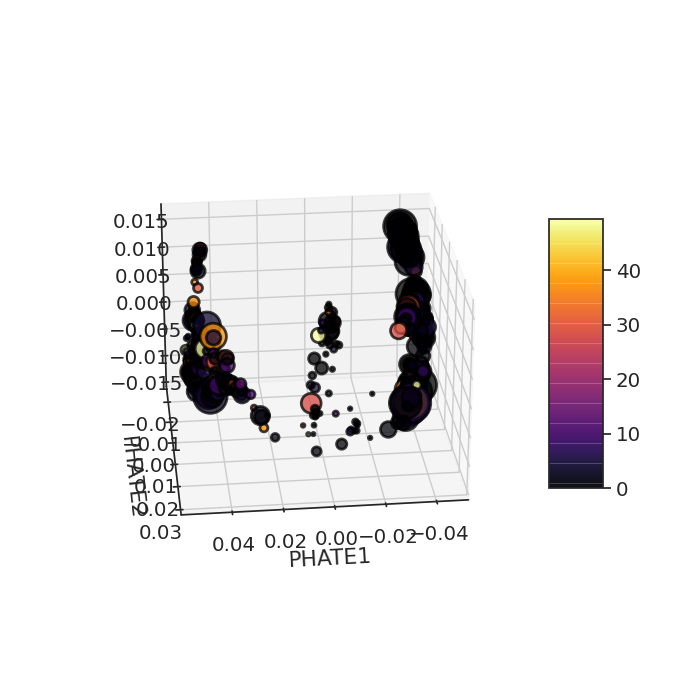

/home/ross/CytoPyLite/static_plots.py:36: UserWarning: Palette invalid for discrete labelling, defaulting to 'inferno'
  warn("Palette invalid for discrete labelling, defaulting to 'inferno'")


<Axes3DSubplot:xlabel='PHATE1', ylabel='PHATE2'>

In [23]:
# Remember to set discrete to False if using continous label!
clusterplot(data=data,
             discrete=False,
             n_components=3,
             label="C8",
             features=['CD57', 'CD161', 'CCR7', 'Va7-2', 'CD8', 
                      'Vd2', 'CD45RA', 'PanGD', 'CD4', 'CD27'],
             method="PHATE",
             scale_factor=1000,
             figsize=(7, 7),
             colourbar_kwargs=dict(shrink=0.5, aspect=5))

<h1>Boxplots and stats</h1>

If you want to perform some univariant statistics and visualisations, I would use the seaborn library (https://seaborn.pydata.org/) for plots and the pingouin library (https://pingouin-stats.org/index.html) for stats.

We can also use the Scikit-Learn library to scale data: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

For example, let's look at the relationship between C8 and proportion of Vd2+ gamma delta T cells between survivors and non-survivors.

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pingouin

In [58]:
# IMPORTANT we have to tell jupyter to switch back to normal plots:
%matplotlib inline

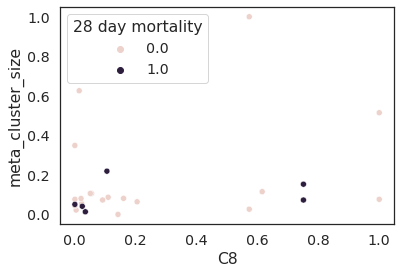

In [67]:
# Put C8 on standard scale
sepsis_data = data[data.septic==True].copy()
# Only want Vδ2+ γδ T cells clusters 
plot_data = sepsis_data[sepsis_data.meta_label.isin(['Vδ2+ γδ T cells (1)', 'Vδ2+ γδ T cells (2)'])].copy()
# Scale the data
# The syntax for Scikit-Learn can look a bit intimidating. Copy and paste what is needed for now 
# and I can run you through it at a later date
plot_data["C8"] = MinMaxScaler().fit_transform(plot_data["C8"].values.reshape(-1, 1))
plot_data["meta_cluster_size"] = MinMaxScaler().fit_transform(plot_data["meta_cluster_size"].values.reshape(-1, 1))
ax = sns.scatterplot(data=plot_data,
                    x="C8",
                    y="meta_cluster_size",
                    hue="28 day mortality")

In [68]:
pingouin.corr(plot_data["meta_cluster_size"],
              plot_data["C8"],
              method="spearman")

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,30,0.118187,"[-0.25, 0.46]",0.013968,-0.059071,0.533931,0.095419
